In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

df = pd.read_excel("tournament_statistics.xlsx", sheet_name="Metronome_Data (Complete)")
df = pd.read_excel("tournament_statistics.xlsx", sheet_name="Pokemon_Data (Complete)")
df

,Pokemon,Type,Team,Defeats,Faints,Self-Destructs,Damage Given (in %),Damage Taken (in %),Games
0,Pinsir,['Bug'],Bug,0,2,1,75.4,180.0,2
1,Heracross,"['Bug', 'Fighting']",Bug,2,2,0,128.9,145.7,2
2,Armaldo,"['Rock', 'Bug']",Bug,1,2,0,205.7,233.0,2
3,Vespiquen,"['Bug', 'Flying']",Bug,1,2,0,91.1,199.9,2
4,Volcarona,"['Bug', 'Fire']",Bug,2,2,0,218.3,180.7,2
...,...,...,...,...,...,...,...,...,...
91,Piloswine,"['Ice', 'Ground']",Ice,0,2,0,116.5,162.6,2
92,Walrein,"['Ice', 'Water']",Ice,4,2,0,368.0,284.7,2
93,Weavile,"['Dark', 'Ice']",Ice,0,2,0,122.7,169.3,2
94,Beartic,['Ice'],Ice,0,2,1,52.9,99.3,2


Make a pie chart showing the percentage of moves used for every type

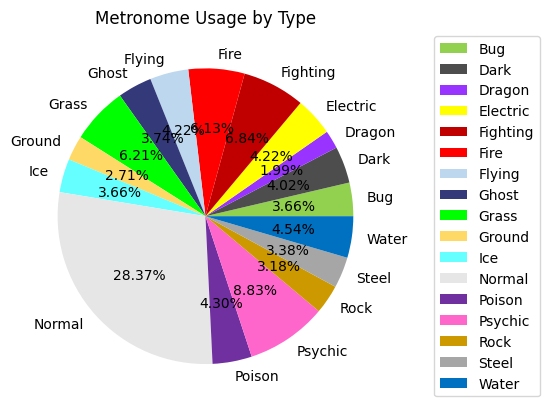

In [19]:
# Pie chart in Matplotlib
df_pie = df.groupby("Type")["Used"].sum().reset_index()
colors = ["#92D050", "#4D4D4D", "#9933FF", "#FFFF00", "#C00000", "#FF0000", "#BDD7EE", "#34397A", "#00FF00", "#FFD966", "#66FFFF", "#E7E6E6", "#7030A0", "#FF66CC", "#CC9900", "#A6A6A6", "#0070C0"]
plt.pie(df_pie["Used"], labels=df_pie["Type"], autopct="%1.2f%%", colors=colors)
plt.title("Metronome Usage by Type")
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
plt.show()

# Pie chart in Plotly
sorted_labels = sorted(df['Type'].unique())
fig = px.pie(df.sort_values("Type"), values="Used", names="Type", category_orders={'Type': sorted_labels})
fig.update_layout(title="Metronome Usage by Type")
fig.update_traces(marker=dict(colors=colors))
fig.update_traces(textposition='outside', textinfo='label+percent')
fig.show()

Make a vertical bar graph showing the top 20 moves chosen by Metronome

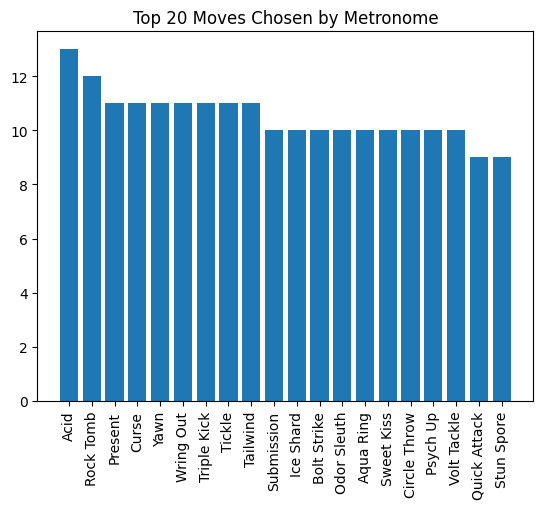

In [49]:
df_vgraph = df.groupby(["Move", "Type"])["Used"].sum().reset_index()
sorted_df = df_vgraph.sort_values("Used", ascending=False)
top_20 = sorted_df.head(20)

# Vertical bar graph using Matplotlib
plt.bar(top_20["Move"], top_20["Used"])
plt.title("Top 20 Moves Chosen by Metronome")
plt.xticks(rotation=90)
plt.show()

# Vertical bar graph using Plotly
fig = px.bar(top_20, x="Move", y="Used")
fig.update_layout(
    title="Top 20 Moves Chosen by Metronome",
    xaxis_tickangle=270
)
fig.show()

Make a horizontal bar graph showing unique moves used per Type

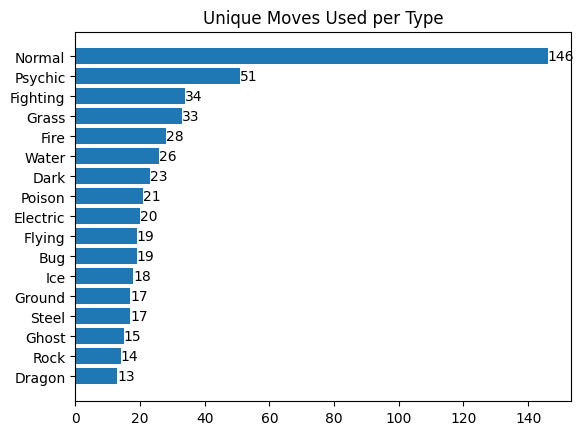

In [78]:
df_hgraph = df.groupby("Type")["Used"].count().reset_index()
sorted_df = df_hgraph.sort_values("Used", ascending=True)

# Vertical bar graph using Matplotlib
plt.barh(sorted_df["Type"], sorted_df["Used"])
for i, value in enumerate(sorted_df["Used"]):
    plt.text(value, i, str(value), ha="left", va="center")
plt.title("Unique Moves Used per Type")
plt.show()

# Vertical bar graph using Plotly
fig = px.bar(sorted_df, x="Used", y="Type", orientation="h")
fig.update_traces(text=sorted_df["Used"], textposition="outside")
fig.update_layout(
    xaxis_title = "",
    yaxis_title = "",
    title="Unique Moves Used per Type"
)
fig.show()

Make a line graph showing the average damage given/taken per game for each team

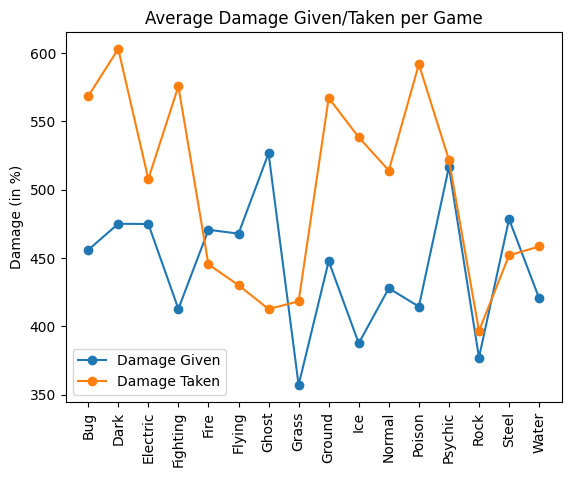

In [94]:
grouped_df = df.groupby("Team").agg({
    "Damage Given (in %)": "sum",
    "Damage Taken (in %)": "sum",
    "Games": "max"
})
grouped_df["Damage Given (in %)"] /= grouped_df["Games"]
grouped_df["Damage Taken (in %)"] /= grouped_df["Games"]
grouped_df.reset_index(inplace=True)

# Make line graph in Matplotlib
fig, ax = plt.subplots()
ax.plot(grouped_df["Team"], grouped_df["Damage Given (in %)"], label="Damage Given", marker="o")
ax.plot(grouped_df["Team"], grouped_df["Damage Taken (in %)"], label="Damage Taken", marker="o")
ax.set_ylabel("Damage (in %)")
ax.set_title("Average Damage Given/Taken per Game")
ax.legend()
plt.xticks(rotation=90)
plt.show()

# Make line graph in Plotly
fig = px.line(grouped_df, x="Team", y=["Damage Given (in %)", "Damage Taken (in %)"], labels={"variable": "Metric", "value": "Percentage"}, markers=True)
# Set labels and title
fig.update_layout(
    xaxis_title="",
    yaxis_title="Damage (in %)",
    title="Average Damage Given/Taken per Game"
)
fig.show()

Make an area chart showing the total defeats/faints for each team

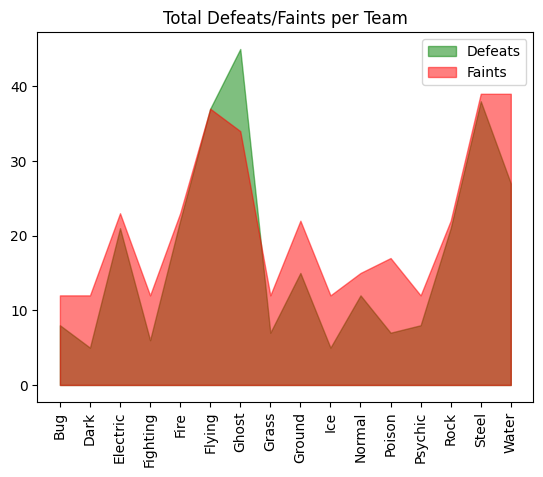

In [111]:
grouped_df = df.groupby("Team").agg({
    "Defeats": "sum",
    "Faints": "sum"
})
grouped_df.reset_index(inplace=True)

# Make area chart in Matplotlib
fig, ax = plt.subplots()
ax.fill_between(grouped_df["Team"], grouped_df["Defeats"], color="green", alpha=0.5, label="Defeats")
ax.fill_between(grouped_df["Team"], grouped_df["Faints"], color="red", alpha=0.5, label="Faints")
ax.set_title("Total Defeats/Faints per Team")
ax.legend()
plt.xticks(rotation=90)
plt.show()

# Make area chart in Plotly
trace_defeats = go.Scatter(x=grouped_df["Team"], y=grouped_df["Defeats"], name='Defeats', fill='tozeroy')
trace_faints = go.Scatter(x=grouped_df["Team"], y=grouped_df["Faints"], name='Faints', fill='tozeroy')
layout = go.Layout(
    xaxis=dict(title=""),
    yaxis=dict(title=""),
    title="Total Defeats/Faints per Team"
)
fig = go.Figure(data=[trace_defeats, trace_faints], layout=layout)
fig.show()